<a href="https://colab.research.google.com/github/yoonjihwan402/medical-data/blob/main/08_multi_layer_perceptron_and_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 멀티 퍼셉트론 모델

## mnist 데이터셋 불러오기

In [1]:
# mnist 데이터셋 활용해서 멀티 퍼셉트론 모델 만들기
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
x_train.shape #6만장의 데이터, 28행, 28열

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
x_test.shape

(10000, 28, 28)

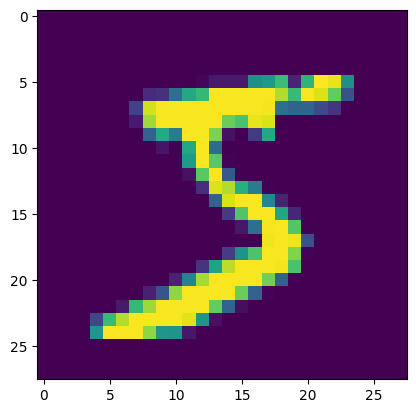

In [5]:
# 손글씨 이미지 출력
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [6]:
x_train.min(), x_train.max()

(np.uint8(0), np.uint8(255))

In [7]:
# 0~1값을 가질 때 딥러닝이 잘 동작하기 떄문에 표준화 진행
x_train = x_train/255
x_test = x_test/255

In [8]:
# 0~9까지의 y값 존재
y_train.min(), y_train.max()

(np.uint8(0), np.uint8(9))

In [9]:
# y값이 범주형이므로 원핫 인코딩 진행
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# 멀티 퍼셉트론 모델 생성
from keras.models import Sequential
from keras.layers import Dense, Flatten
model = Sequential()
model.add(Flatten(input_shape=(28,28))) # 2차원을 1차원으로 변환
model.add(Dense(10, activation='softmax')) # 1차원입력을 10개로 분류

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #copile

In [13]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1) # vervose : 정보를 상세히 출력, epoch, batch_size ppt 참고

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7368 - loss: 1.0199
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9002 - loss: 0.3747
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9116 - loss: 0.3236
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9156 - loss: 0.3054
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9164 - loss: 0.2959
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9238 - loss: 0.2773
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9232 - loss: 0.2735
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9246 - loss: 0.2706
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9258 - loss: 0.2659
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9286 - loss: 0.2571


In [ ]:
model.evaluate(x_test, y_test, verbose=0) # loss, accuracy

[0.2630421221256256, 0.927299976348877]

In [15]:
history.history

{'accuracy': [0.8353999853134155,
  0.9020500183105469,
  0.9118166565895081,
  0.9175833463668823,
  0.9197166562080383,
  0.9225333333015442,
  0.923966646194458,
  0.9251833558082581,
  0.9261000156402588,
  0.926966667175293],
 'loss': [0.6635374426841736,
  0.3617720305919647,
  0.31936854124069214,
  0.29943108558654785,
  0.2874569892883301,
  0.27958202362060547,
  0.2734341025352478,
  0.269059419631958,
  0.26532697677612305,
  0.26225635409355164]}

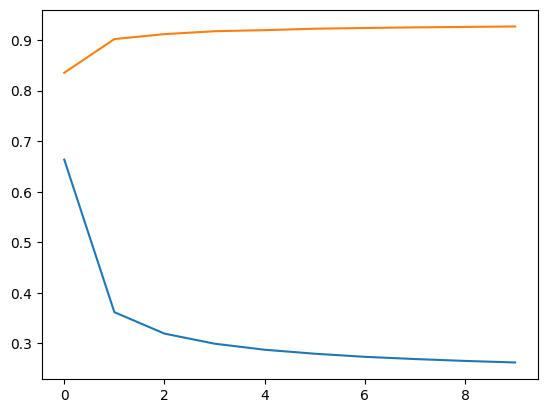

In [16]:
# plot을 통해 model의 loss, accuracy 변화 그리기
plt.plot(history.history['loss']) #파랑. 손실성
plt.plot(history.history['accuracy']) #주황. 정확성

In [19]:
# 더 좋은 성능을 위해 100개씩의 은닉값을 가진 은닉층 2개 추가
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu')) # relu의 함수를 이용
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# vervose : 정보를 상세히 출력, epoch, batch_size ppt 참고
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test)) #validation

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8211 - loss: 0.6408 - val_accuracy: 0.9487 - val_loss: 0.1736
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9553 - loss: 0.1539 - val_accuracy: 0.9631 - val_loss: 0.1219
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9706 - loss: 0.0986 - val_accuracy: 0.9676 - val_loss: 0.1087
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9772 - loss: 0.0762 - val_accuracy: 0.9742 - val_loss: 0.0855
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9822 - loss: 0.0584 - val_accuracy: 0.9732 - val_loss: 0.0838
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9853 - loss: 0.0487 - val_accuracy: 0.9745 - val_loss: 0.0773
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9877 - loss: 0.0397 - val_accuracy: 0.9764 - val_loss: 0.0756
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9906 - loss: 0.0320 - val_accuracy: 0.

In [22]:
model.evaluate(x_test, y_test, verbose=0)

[0.0870387852191925, 0.9764999747276306]

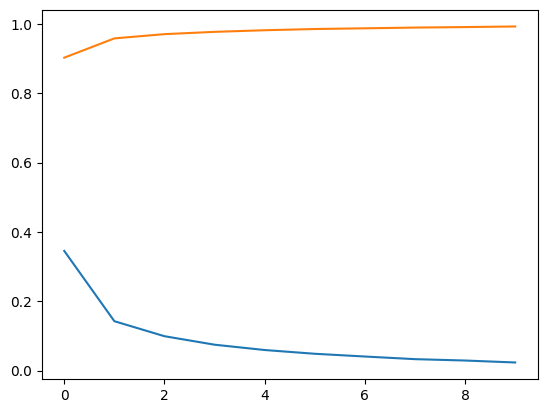

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

실습 1 : 위 학습 결과를 해석해보세요. 그리고 그 근거를 찾아보세요.
처음에 했던 플롯보다 은닉값을 더 추가한 플롯의 정확도가 더 향상되었다. 결과적으로 좋은 모델이지만 과적합이 일어나있다.

# CNN

In [43]:
# CNN에 필요한 레이어 추가
from keras.layers import Conv2D, MaxPooling2D # convolution 레이어 2D 이용

In [44]:
# 모델 생성
conv_model = Sequential()
conv_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
conv_model.add(MaxPooling2D(pool_size=(2,2))) # pool레이어, 사이즈 축소

In [45]:
# convolution layer, max pooling layer 추가
conv_model.add(Conv2D(15, (3,3), activation='relu'))
conv_model.add(MaxPooling2D(pool_size=(2,2)))

In [46]:
# flatten and classification
conv_model.add(Flatten())
conv_model.add(Dense(64, activation='relu'))
conv_model.add(Dense(10, activation='softmax'))

In [47]:
# compile
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 모델 학습
conv_history = conv_model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))
# 연산이 느린 이유는 레이어를 많이 쌓았고 conv 레이어도 이용을 했기 때문

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9780 - loss: 0.0728 - val_accuracy: 0.9812 - val_loss: 0.0555
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9823 - loss: 0.0561 - val_accuracy: 0.9830 - val_loss: 0.0496
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9863 - loss: 0.0443 - val_accuracy: 0.9854 - val_loss: 0.0434
Epoch 4/10
163/469 ━━━━━━━━━━━━━━━━━━━━ 19s 65ms/step - accuracy: 0.9881 - loss: 0.0368

In [ ]:
conv_model.evaluate(x_test, y_test, verbose=0)

In [ ]:
# 좋은 성능
# 과적합
plt.plot(conv_history.history['loss'])
plt.plot(conv_history.history['accuracy'])

실습 2 : 위 학습 결과를 해석해보세요. 그리고 그 근거를 찾아보세요.

1.   항목 추가
2.   항목 추가


레이어를 더욱 추가해서 시간은 CNN이 더 오래걸리지만 정확성 향상했다.
결과적으로 CNN이 더 좋다